In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load the dataset
#reddit dataset
reddit = pd.read_csv('reddit_sentiments.csv')
reddit.head()

,SCORE,ID,SUBREDDIT,NUM_COMMENTS,TIMESTAMP,TIME_OF_DAY,TEXT,NEG,NEU,POS,COMPOUND,SENTIMENTS
0,45,g94qma,SuggestALaptop,0,2020/04/28 09:06:12,Morning,Ignore Private Messages Suggesting Laptops The...,0.079,0.812,0.108,0.7184,1
1,42,ekkvox,SuggestALaptop,2,2020/01/06 15:23:07,Afternoon,SuggestALaptop Stress Test Project! Submit Vie...,0.030,0.833,0.137,0.9408,1
2,16,gqt1pd,SuggestALaptop,15,2020/05/27 00:20:20,Night,I need a laptop for gaming coding video editin...,0.015,0.818,0.166,0.9883,1
3,5,gqv6vt,SuggestALaptop,1,2020/05/27 03:22:56,Night,So I can't buy this yet? If I can buy it where...,0.051,0.785,0.164,0.9577,1
4,16,gqp7ra,SuggestALaptop,30,2020/05/26 19:15:01,Evening,Alienware M15 vs Lenovo Y740? Any thoughts on ...,0.000,0.905,0.095,0.8753,1


In [3]:
#comments under reddit post dataset
comments = pd.read_csv('comments_sentiments.csv')
comments.head()

,ID,SUBREDDIT,NEW_COMMENTS,NEG,NEU,POS,COMPOUND,SENTIMENTS
0,ekkvox,SuggestALaptop,have questions our Discord Server is best way ...,0.124,0.598,0.278,0.8257,1
1,ekkvox,SuggestALaptop,Can anyone help me out purchasing a laptop for...,0.000,0.857,0.143,0.7059,1
2,gqt1pd,SuggestALaptop,Ask chewy,0.000,1.000,0.000,0.0000,0
3,gqt1pd,SuggestALaptop,Looks like a great deal at that price!,0.000,0.420,0.580,0.7840,1
4,gqt1pd,SuggestALaptop,Ideapad or yoga whatever they are called where...,0.000,1.000,0.000,0.0000,0


In [4]:
#twitter dataset
twitter = pd.read_csv('twitter_sentiments.csv')
twitter.head()

,TIMESTAMP,MODEL,NEW_TEXT,TIME_OF_DAY,NEG,NEU,POS,COMPOUND,SENTIMENTS
0,2020/05/28 19:30:02,HP Spectre,90s fun for the kids HP HPSpectre laptops comp...,Evening,0.000,0.784,0.216,0.7650,1
1,2020/05/28 04:38:28,HP Spectre,Save 200 on the HP Spectre x360 Now 1349.99! O...,Night,0.000,0.841,0.159,0.6467,1
2,2020/05/24 01:58:02,HP Spectre,Are you ready for a Change? Why not try an alt...,Night,0.000,0.882,0.118,0.5514,1
3,2020/05/22 22:38:01,HP Spectre,Amazon is under investigation in France declar...,Evening,0.117,0.843,0.040,-0.6476,-1
4,2020/05/20 11:40:37,HP Spectre,Brand new sealed HP SPECTRE X360 i7 512gb 8gb ...,Morning,0.000,1.000,0.000,0.0000,0


In [5]:
#merge all the text and sentiments columns
df1 = reddit[['SUBREDDIT', 'TEXT', 'SENTIMENTS']]
df1.columns = ['MODEL', 'TEXT', 'SENTIMENTS']
df2 = comments[['SUBREDDIT', 'NEW_COMMENTS', 'SENTIMENTS']]
df2.columns = ['MODEL', 'TEXT', 'SENTIMENTS']
df3 = twitter[['MODEL', 'NEW_TEXT', 'SENTIMENTS']]
df3.columns = ['MODEL', 'TEXT', 'SENTIMENTS']
print(df1.shape)
print(df2.shape)
print(df3.shape)
print('\n')

text_df = pd.concat([df1,df2,df3])
#text_df.to_csv("Sentiment_data.csv")
print(text_df.shape)
text_df.head()

(5979, 3)
(14465, 3)
(24102, 3)


(44546, 3)


,MODEL,TEXT,SENTIMENTS
0,SuggestALaptop,Ignore Private Messages Suggesting Laptops The...,1
1,SuggestALaptop,SuggestALaptop Stress Test Project! Submit Vie...,1
2,SuggestALaptop,I need a laptop for gaming coding video editin...,1
3,SuggestALaptop,So I can't buy this yet? If I can buy it where...,1
4,SuggestALaptop,Alienware M15 vs Lenovo Y740? Any thoughts on ...,1


## Data exploration

In [7]:
#settings for plot
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 12
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


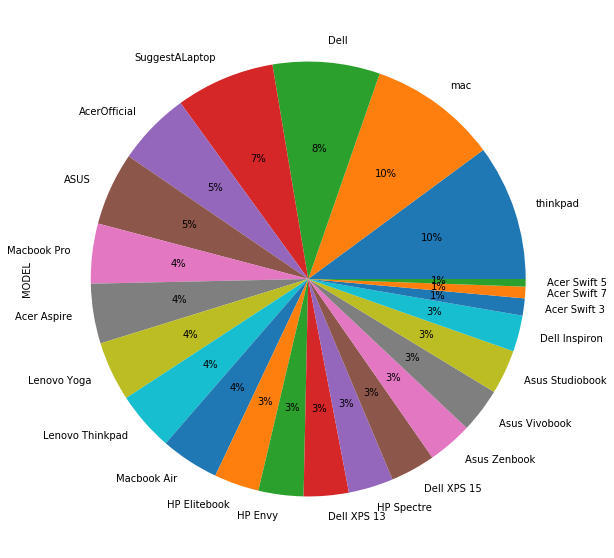

In [8]:
text_df.MODEL.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

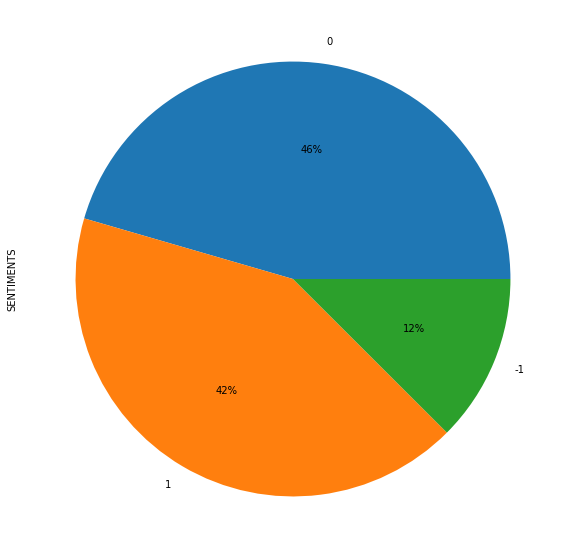

In [9]:
text_df.SENTIMENTS.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

Sentiments column description:
* 1 - Positive sentiments
* 0 - Neutral sentiments
* -1 - Negative sentiments

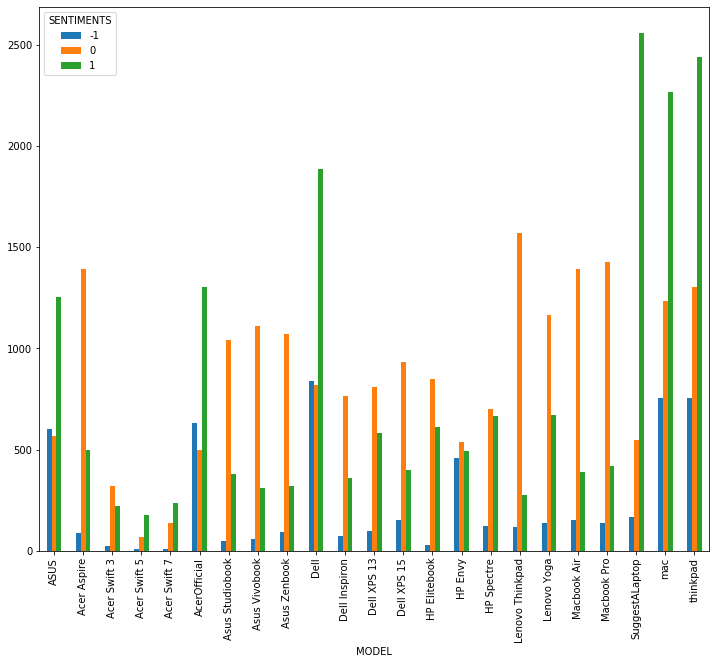

In [10]:
laptop_sentiment = text_df.groupby(['MODEL', 'SENTIMENTS']).SENTIMENTS.count().unstack()
laptop_sentiment.plot(kind='bar')
plt.show()

In [11]:
#feature selection
features = text_df.iloc[:, 1].values
labels = text_df.iloc[:, 2].values

In [12]:
#simple data cleaning
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    
    # Remove numbers
    processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
    
processed_features = pd.DataFrame(processed_features)
processed_features.columns = ['TEXT']

In [13]:
processed_features.head()

,TEXT
0,ignore private messages suggesting laptops the...
1,suggestalaptop stress test project submit view...
2,i need laptop for gaming coding video editing ...
3,so can buy this yet if can buy it where do fin...
4,alienware vs lenovo any thoughts on which is p...


## Text normalization

In [14]:
#tokenizing
tokenized_features = processed_features['TEXT'].apply(lambda x: x.split())
print(tokenized_features.head())

0    [ignore, private, messages, suggesting, laptop...
1    [suggestalaptop, stress, test, project, submit...
2    [i, need, laptop, for, gaming, coding, video, ...
3    [so, can, buy, this, yet, if, can, buy, it, wh...
4    [alienware, vs, lenovo, any, thoughts, on, whi...
Name: TEXT, dtype: object


In [15]:
#stemming
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokenized_features = tokenized_features.apply(lambda x: [stemmer.stem(i) for i in x])

In [16]:
#stitch the tokens back together
for i in range(len(tokenized_features)):
    tokenized_features[i] = ' '.join(tokenized_features[i])
    
processed_features['TEXT'] = tokenized_features

In [17]:
#Term Frequency and Inverse Document Frequency(TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words='english')
processed_features = tfidf_vectorizer.fit_transform(processed_features['TEXT'])
print(processed_features.shape)

(44546, 2500)


In [18]:
#splitting training and testing set
#import library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features[:44546,:], labels, test_size=0.3, random_state=42)

## Building the model
These are the list of algorithms used for modeling text classifier:
1. Logistic Regression
2. Random Forest
3. Gaussian Naive Bayes
4. Support Vector Machine
5. XGBoost

### 1. Logistic Regression

In [19]:
#training the model
#import library
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/sidratulmuntaha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
#making predictions
predictions_lr = log_reg.predict(X_test)

In [21]:
#calculating the accuracy
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

acc_lr = round(accuracy_score(y_test, predictions_lr) * 100, 2)
fsc_lr = round(f1_score(y_test, predictions_lr, average='macro') * 100, 2)
print('Accuracy of Logistic Regression model : ', acc_lr)
print('F1-score of Logistic Regression model : ', fsc_lr)

Accuracy of Logistic Regression model :  85.64
F1-score of Logistic Regression model :  78.8


### 2. Random Forest

In [22]:
#training the model
#import library
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=400, random_state=11)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [23]:
#making predictions
predictions_rf = text_classifier.predict(X_test)

In [24]:
#calculating the accuracy
acc_rf = round(accuracy_score(y_test, predictions_rf) * 100, 2)
fsc_rf = round(f1_score(y_test, predictions_rf, average='macro') * 100, 2)
print('Accuracy of Random Forest model : ', acc_rf)
print('F1-score of Random Forest model : ', fsc_rf)

Accuracy of Random Forest model :  83.99
F1-score of Random Forest model :  71.74


### 3. Gaussian Naive Bayes

In [25]:
#import library
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()                       
model.fit(X_train.toarray(), y_train)             

GaussianNB(priors=None, var_smoothing=1e-09)

In [26]:
#making predictions
predictions_nb = model.predict(X_test.toarray())

In [27]:
#calculating the accuracy
acc_nb = round(accuracy_score(y_test, predictions_nb) * 100, 2)
fsc_nb = round(f1_score(y_test, predictions_nb, average='macro') * 100, 2)
print('Accuracy of Gaussian Naive Bayes model : ', acc_nb)
print('F1-score of Gaussian Naive Bayes model : ', fsc_nb)

Accuracy of Gaussian Naive Bayes model :  62.46
F1-score of Gaussian Naive Bayes model :  57.72


### 4. Support Vector Machine

In [28]:
#import library
from sklearn import svm

svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [29]:
#making predictions
predictions_svm = svc.predict(X_test)

In [30]:
#calculating the accuracy
acc_svm = round(accuracy_score(y_test, predictions_svm) * 100, 2)
fsc_svm = round(f1_score(y_test, predictions_svm, average='macro') * 100, 2)
print('Accuracy of Support Vector Machine model : ', acc_svm)
print('F1-score of Support Vector Machine model : ', fsc_svm)

Accuracy of Support Vector Machine model :  87.01
F1-score of Support Vector Machine model :  81.23


### 5. XGBoost

In [31]:
#import library
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=6, n_estimators=1000)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# Prediction on test data
predictions_xgb = xgb.predict(X_test)

In [33]:
#calculating the accuracy
acc_xgb = round(accuracy_score(y_test, predictions_xgb) * 100, 2)
fsc_xgb = round(f1_score(y_test, predictions_xgb, average='macro') * 100, 2)
print('Accuracy of XGBoost model : ', acc_xgb)
print('F1-score of XGBoost model : ', fsc_xgb)

Accuracy of XGBoost model :  87.94
F1-score of XGBoost model :  81.93


## Model evaluation

In [34]:
#evaluating the model
#import library
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion matrix for Logistic Regression model:')
print(confusion_matrix(y_test, predictions_lr))
print('Classification report for Logistic Regression model:')
print(classification_report(y_test, predictions_lr))
print('\n')
print('Confusion matrix for Random Forest model:')
print(confusion_matrix(y_test, predictions_rf))
print('Classification report for Random Forest model:')
print(classification_report(y_test, predictions_rf))
print('\n')
print('Confusion matrix for Gaussian Naive Bayes model:')
print(confusion_matrix(y_test, predictions_nb))
print('Classification report for Gaussian Naive Bayes model:')
print(classification_report(y_test, predictions_nb))
print('\n')
print('Confusion matrix for Support Vector Machine model:')
print(confusion_matrix(y_test, predictions_svm))
print('Classification report for Support Vector Machine model:')
print(classification_report(y_test, predictions_svm))
print('\n')
print('Confusion matrix for XGBoost model:')
print(confusion_matrix(y_test, predictions_xgb))
print('Classification report for XGBoost model:')
print(classification_report(y_test, predictions_xgb))
print('\n')

Confusion matrix for Logistic Regression model:
[[ 798  378  476]
 [  65 5670  285]
 [ 173  542 4977]]
Classification report for Logistic Regression model:
              precision    recall  f1-score   support

          -1       0.77      0.48      0.59      1652
           0       0.86      0.94      0.90      6020
           1       0.87      0.87      0.87      5692

    accuracy                           0.86     13364
   macro avg       0.83      0.77      0.79     13364
weighted avg       0.85      0.86      0.85     13364



Confusion matrix for Random Forest model:
[[ 426  300  926]
 [  28 5522  470]
 [  61  355 5276]]
Classification report for Random Forest model:
              precision    recall  f1-score   support

          -1       0.83      0.26      0.39      1652
           0       0.89      0.92      0.91      6020
           1       0.79      0.93      0.85      5692

    accuracy                           0.84     13364
   macro avg       0.84      0.70      0.72  

## Model Comparison

In [35]:
#comparison of the models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Support Vector Machine', 'XGBoost'],
    'Accuracy Score': [acc_lr, acc_rf, acc_nb, acc_svm, acc_xgb], 
    'F1-Score': [fsc_lr, fsc_rf, fsc_nb, fsc_svm, fsc_xgb]})
models

,Model,Accuracy Score,F1-Score
0,Logistic Regression,85.64,78.80
1,Random Forest,83.99,71.74
2,Gaussian Naive Bayes,62.46,57.72
3,Support Vector Machine,87.01,81.23
4,XGBoost,87.94,81.93


## Save the model

In [40]:
#import library
import pickle

#pickling the vectorizer
pickle.dump(tfidf_vectorizer, open('vectorizer.pkl', 'wb'))

#pickling the model
#Logistic Regression
pickle.dump(log_reg, open('LogisticRegression_classifier.pkl', 'wb'))
#Random Forest
pickle.dump(text_classifier, open('RandomForest_classifier.pkl', 'wb'))
#Gaussian Naive Bayes
pickle.dump(model, open('NaiveBayes_classifier.pkl', 'wb'))
#Support Vector Machine
pickle.dump(svc, open('SupportVector_classifier.pkl', 'wb'))
#XGBoost
pickle.dump(xgb, open('XGBoost_classifier.pkl', 'wb'))

In [39]:
# importing kivy moduels 
from kivy.app import App
from kivy.uix.textinput import TextInput
from kivy.uix.button import Button
from kivy.uix.label import Label
from kivy.uix.boxlayout import BoxLayout
# ending importing kivy moduels
import pickle
import os
import numpy as np


In [ ]:
current_dir = os.path.dirname(__file__)
# we load the classifier.pkl we created before
clf = pickle.load(open(os.path.join(current_dir,
                 'pkl_objects',
                 'classifier.pkl'), 'rb'))


def classify(document):
    # this dictionary returns as outputs 'negative ' or 'positive' instead of 0 or 1
    label = {0: 'negative', 1: 'positive'}
    # transforming the document into analyzable data
    X = vect.transform([document])
    y = clf.predict(X)[0]
    proba = np.max(clf.predict_proba(X))
    return label[y], proba

In [ ]:
class Application(App):
    def build(self):
        # creating our layout. we want it to display objects vertically
        self.layout = BoxLayout(orientation='vertical')
        # creating the submit review button, our review field, the label displaying the prediction and the correct and incorrect buttons that are useful to re-train the model
        submit_button = Button(text='classify review', on_press=self.classify_f)
        self.review = TextInput(hint_text='Your Review')
        self.label = Label()
        self.layout.add_widget(self.review)
        self.layout.add_widget(submit_button)
        self.layout.add_widget(self.label)
        return self.layout

    def classify_f(self, action):
        print(self.review.text)
        pred, proba = classify(self.review.text)
        print(pred)
        print(str(round(proba, 2)*100) + " % ")
        self.label.text = pred + "  " + str(round(proba, 2)*100) + " % "


if __name__ == '__main__':
    # running the application
    Application().run()